In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('StoreCountOnActualDataFrom7_2021To9_2023.csv')

In [ ]:
data.head()

,TransDate,Quantity,NetAmount,DiscAmount,Transdate,StoreCount
0,7/1/2021,29020.0,30075318.98,5575538.5,00:00.0,164
1,7/2/2021,9464.0,9560455.00,1717321.3,00:00.0,54
2,7/3/2021,54382.0,44738056.52,8307404.9,00:00.0,167
3,7/4/2021,35971.0,32406101.87,6191364.2,00:00.0,129
4,7/5/2021,24438.0,25945143.64,699155.5,00:00.0,168


In [ ]:
# Convert TransDate to datetime data type
data['TransDate'] = pd.to_datetime(data['TransDate'])

In [ ]:
# Summary statistics
print(data.describe())

            Quantity     NetAmount    DiscAmount  StoreCount
count     794.000000  7.940000e+02  7.940000e+02  794.000000
mean    44301.865948  3.851147e+07  5.972356e+06  201.382872
std     25356.930272  2.284495e+07  6.510946e+06   43.372948
min    -78132.000000  6.534181e+04 -3.970000e+04    1.000000
25%     27182.250000  2.638859e+07  8.564560e+05  191.000000
50%     39865.500000  3.408258e+07  3.174761e+06  208.000000
75%     57546.000000  4.609757e+07  9.574473e+06  230.000000
max    156054.000000  1.984231e+08  3.624799e+07  245.000000


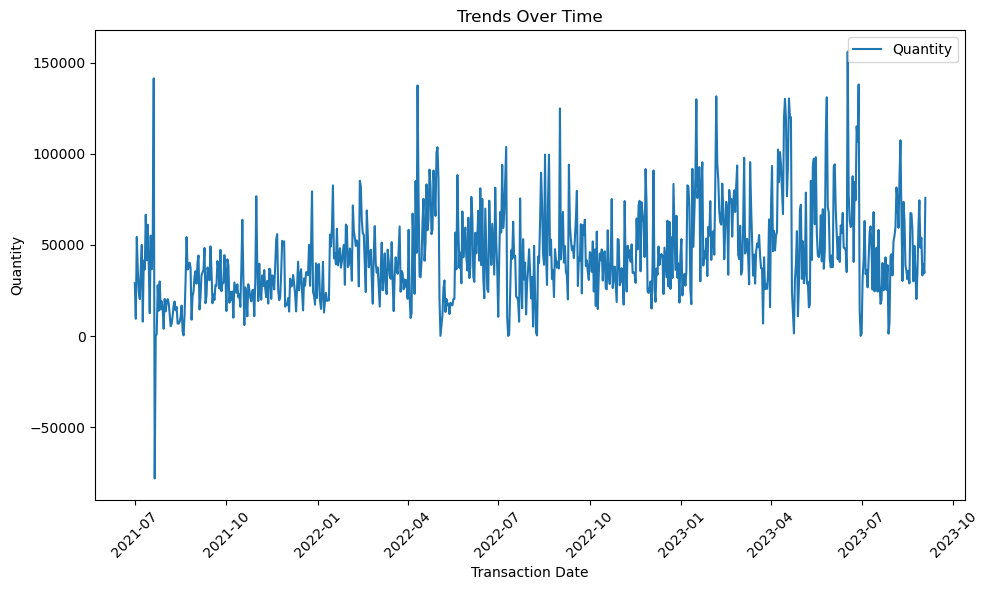

In [ ]:
# Line plot of Quantity, NetAmount, and StoreCount over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransDate', y='Quantity', data=data, label='Quantity')
plt.xlabel('Transaction Date')
plt.ylabel('Quantity')
plt.title('Trends Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

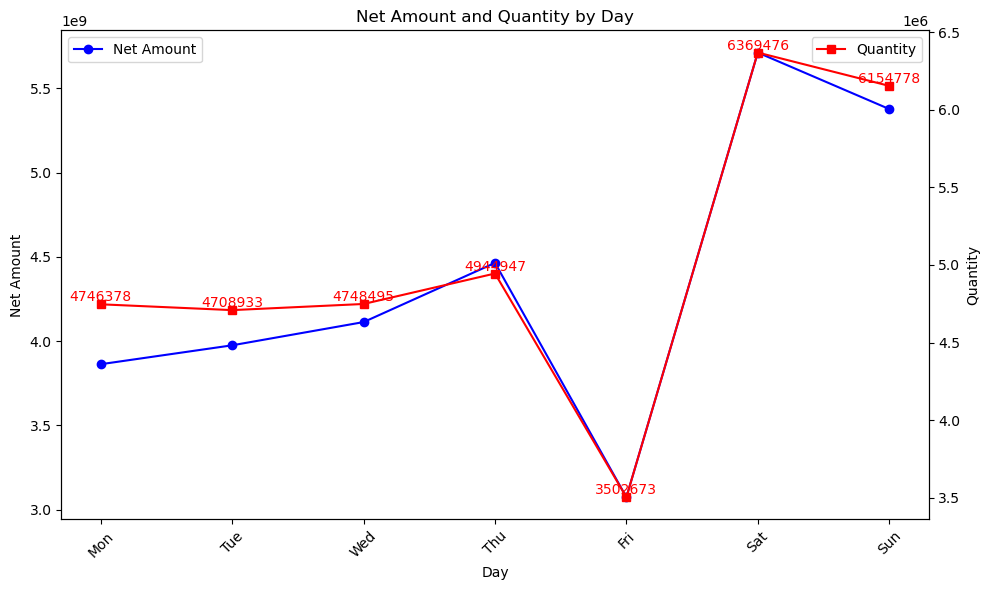

In [ ]:
# Convert TransDate to datetime
data['TransDate'] = pd.to_datetime(data['TransDate'], format='%d/%m/%Y')

# Create a 'Day' column based on TransDate
data['Day'] = data['TransDate'].dt.strftime('%a')

# Group data by day and calculate total NetAmount and Quantity for each day
day_grouped = data.groupby('Day')[['NetAmount', 'Quantity']].sum()

# Sort the data by day name
day_grouped = day_grouped.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

days = day_grouped.index
net_amounts = day_grouped['NetAmount']
quantities = day_grouped['Quantity']

plt.figure(figsize=(10, 6))

# Plot the NetAmount data on the primary y-axis
net_amount_line, = plt.plot(days, net_amounts, marker='o', linestyle='-', color='b', label='Net Amount')
plt.ylabel('Net Amount')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Create a twin y-axis for the Quantity data
ax2 = plt.gca().twinx()
quantity_line = ax2.plot(days, quantities, marker='s', linestyle='-', color='r', label='Quantity')[0]
ax2.set_ylabel('Quantity')
ax2.legend(loc='upper right')

# Label the Quantity values directly on the graph
for x, y in zip(days, quantities):
    ax2.text(x, y, f'{int(y)}', ha='center', va='bottom', color='r')

# Annotate the Net Amount line with labels
for x, y in zip(days, net_amounts):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,-20), ha='center', color='b')

plt.title('Net Amount and Quantity by Day')
plt.tight_layout()
plt.show()

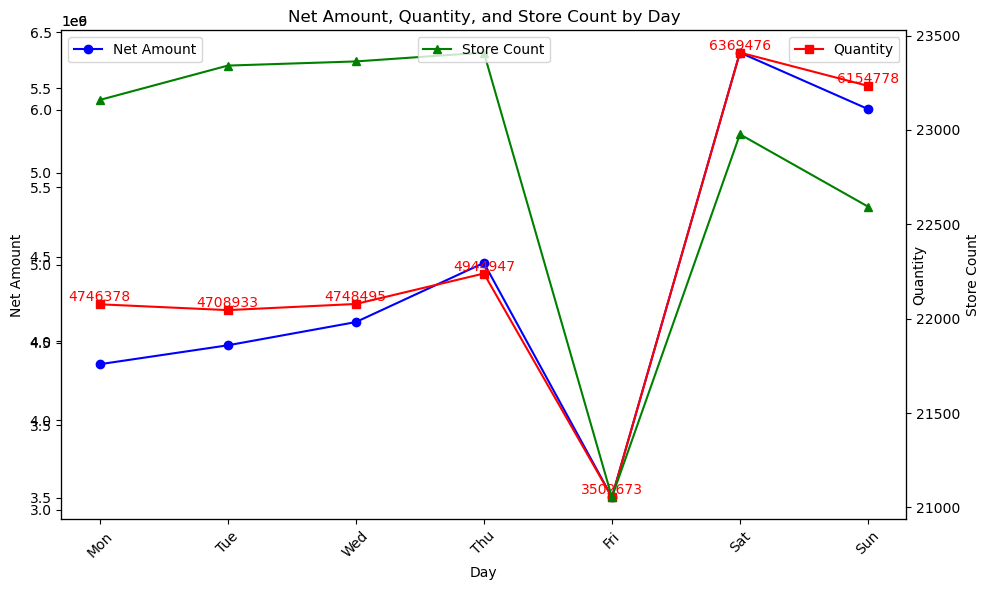

In [ ]:

# Convert TransDate to datetime
data['TransDate'] = pd.to_datetime(data['TransDate'], format='%d/%m/%Y')

# Create a 'Day' column based on TransDate
data['Day'] = data['TransDate'].dt.strftime('%a')

# Group data by day and calculate total NetAmount, Quantity, and StoreCount for each day
day_grouped = data.groupby('Day')[['NetAmount', 'Quantity', 'StoreCount']].sum()

# Sort the data by day name
day_grouped = day_grouped.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

days = day_grouped.index
net_amounts = day_grouped['NetAmount']
quantities = day_grouped['Quantity']
store_counts = day_grouped['StoreCount']

plt.figure(figsize=(10, 6))

# Plot the NetAmount data on the primary y-axis
net_amount_line, = plt.plot(days, net_amounts, marker='o', linestyle='-', color='b', label='Net Amount')
plt.ylabel('Net Amount')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Create a twin y-axis for the Quantity data
ax2 = plt.gca().twinx()
quantity_line = ax2.plot(days, quantities, marker='s', linestyle='-', color='r', label='Quantity')[0]
ax2.set_ylabel('Quantity')
ax2.legend(loc='upper right')

# Label the Quantity values directly on the graph
for x, y in zip(days, quantities):
    ax2.text(x, y, f'{int(y)}', ha='center', va='bottom', color='r')

# Create a second twin y-axis for the StoreCount data
ax3 = plt.gca().twinx()
store_count_line = ax3.plot(days, store_counts, marker='^', linestyle='-', color='g', label='Store Count')[0]
ax3.set_ylabel('Store Count')
ax3.legend(loc='upper center')

# Annotate the Net Amount line with labels
for x, y in zip(days, net_amounts):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,-20), ha='center', color='b')

plt.title('Net Amount, Quantity, and Store Count by Day')
plt.tight_layout()
plt.show()


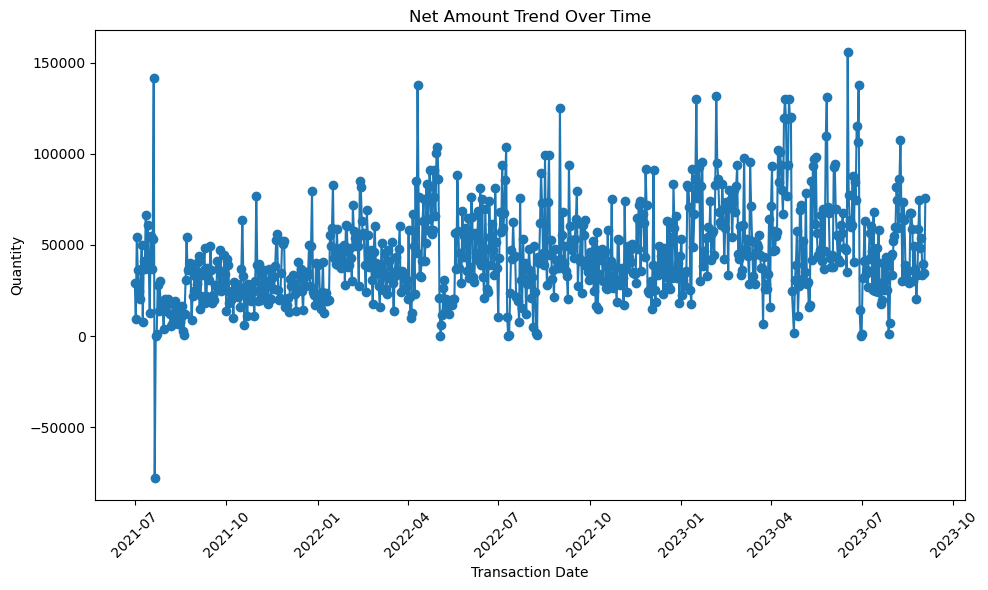

In [ ]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(data['TransDate'], data['Quantity'], marker='o', linestyle='-')
plt.xlabel('Transaction Date')
plt.ylabel('Quantity')
plt.title('Net Amount Trend Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='TransDate', ylabel='NetAmount'>

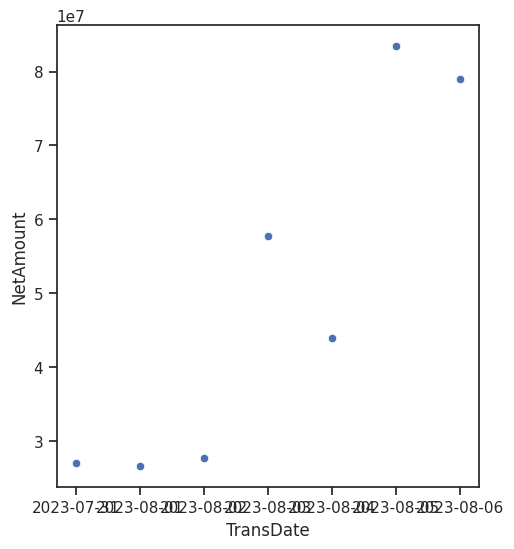

In [ ]:
# Scatter plot and histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='TransDate', y='NetAmount', data=data)


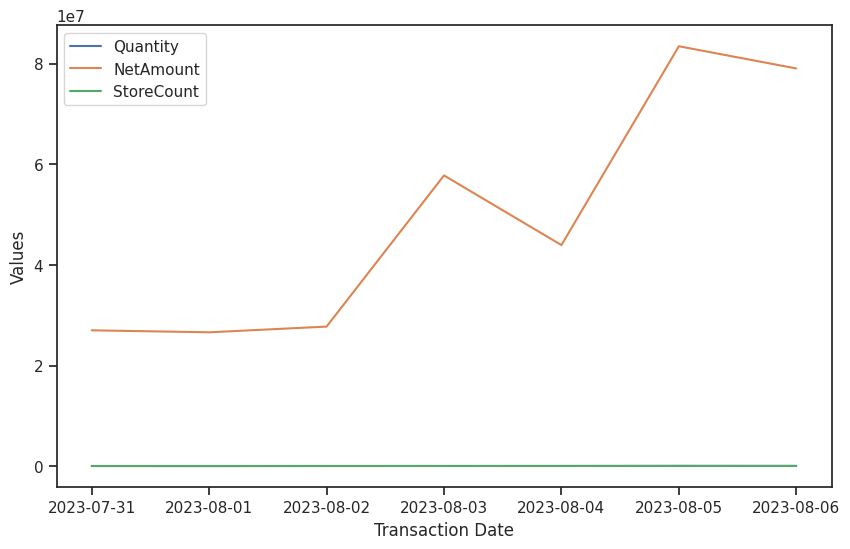

In [ ]:
# Line plot of Quantity, NetAmount, and StoreCount over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransDate', y='Quantity', data=data, label='Quantity')
sns.lineplot(x='TransDate', y='NetAmount', data=data, label='NetAmount')
sns.lineplot(x='TransDate', y='StoreCount', data=data, label='StoreCount')
plt.xlabel('Transaction Date')
plt.ylabel('Values')
plt.legend()
plt.show()

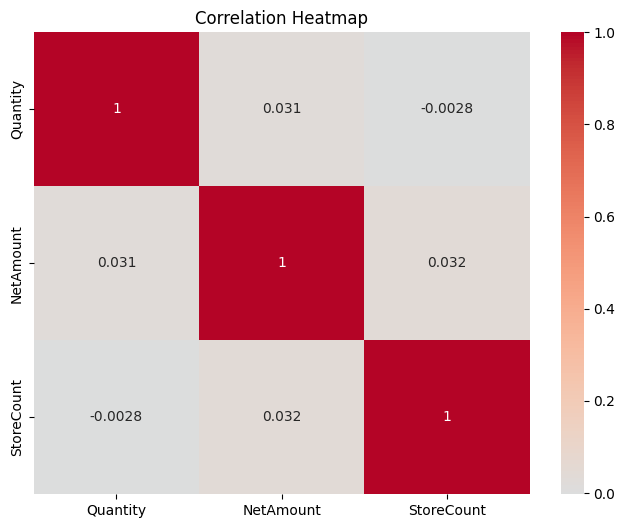

In [ ]:
# Correlation heatmap
correlation_matrix = data[['Quantity', 'NetAmount', 'StoreCount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()